In [7]:
from Parser import parse_frames
from scipy.signal import medfilt
from Functions import find_extremas, filter_extremas, detect_side, analyse_each_rep
from JointAngles import JointAngles
import numpy as np
import math
import glob
import os
import itertools
import pickle
import matplotlib.pyplot as plt



Starting...
Keypoints from folder: bicep_curl_correct_1
Detected arm: right

----------------------------Filtering minimas-------------------------------------

Size of minima array: 7
------------------------------------------------------------------------------------------


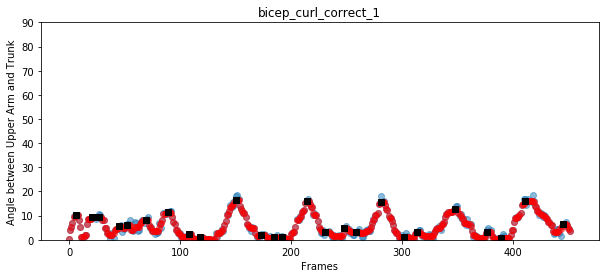

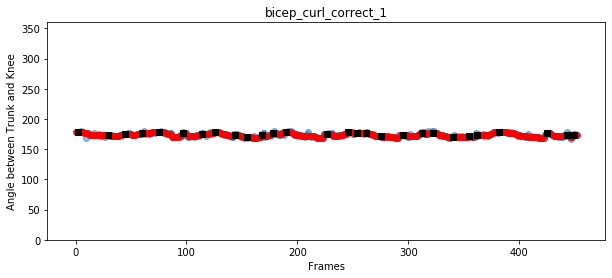

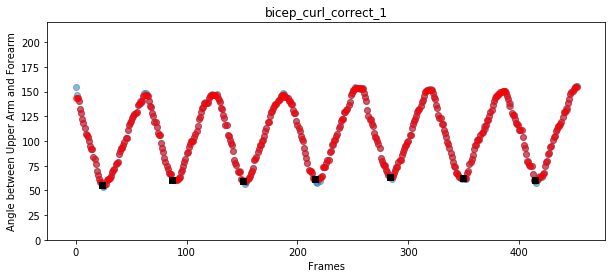

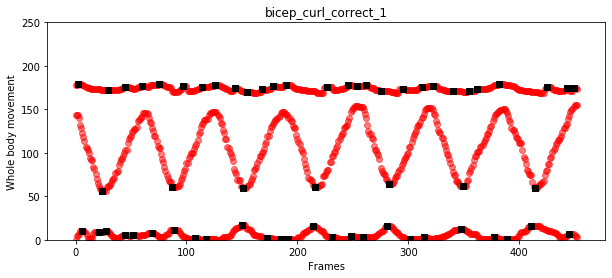

Number of reps performed: 8

Repetition: 1

Minimum angle between upper arm and forearm: 55.922870512881
Maximum angle between upper arm and forearm: 143.13061074120355
Maximum angle between upper arm and trunk: 10.187522296830512
Minimum angle between trunk and knee: 172.72708308485147

Repetition: 2

Minimum angle between upper arm and forearm: 55.922870512881
Maximum angle between upper arm and forearm: 146.11806810092105
Maximum angle between upper arm and trunk: 10.797205744842778
Minimum angle between trunk and knee: 171.83151623755123

Repetition: 3

Minimum angle between upper arm and forearm: 59.86685001774541
Maximum angle between upper arm and forearm: 146.65669661240523
Maximum angle between upper arm and trunk: 16.557662671674464
Minimum angle between trunk and knee: 170.29630365153187

Repetition: 4

Minimum angle between upper arm and forearm: 59.86685001774541
Maximum angle between upper arm and forearm: 146.5702875848435
Maximum angle between upper arm and trunk: 16.55

In [8]:
# modify this path for other videos 
# input_folder = "/home/aleko/Documents/Projects/IndividualProject/bicepvid"
#input_folder = "C:\\Users\\altaok\\Documents\\GitHub\\IndividualProject\\keypoints_for_all\\bicep_curl"
input_folder = 'C:\\Users\\ak5u16\\Desktop\\IndividualProject\\keypoints_for_all\\bicep_curl'
folder_paths = glob.glob(os.path.join(input_folder, 'bicep_curl_correct_1'))     

for folder in folder_paths:
    print("Starting..." + "\nKeypoints from folder: " + os.path.basename(folder))
    video_name = os.path.basename(folder)
    frame_poses = parse_frames(folder)
    
    joint_angles = JointAngles('bicep_curl', frame_poses)
    print('Detected arm: ' + joint_angles.side)

    upArm_trunk_angles = np.array(joint_angles.upArm_trunk_angles)
    upArm_trunk_angles_filtered = medfilt(medfilt(upArm_trunk_angles, 5), 5)
    
   
    upArm_forearm_angles = np.array(joint_angles.upArm_forearm_angles)
    upArm_forearm_angles_filtered = medfilt(medfilt(upArm_forearm_angles, 5), 5)
    
    trunk_knee_angles = np.array(joint_angles.trunk_knee_angles)
    trunk_knee_angles_filtered = medfilt(medfilt(trunk_knee_angles, 5), 5)
    
    # Find upper arm and trunk maximum angles to detect wrong form 
    upArm_trunk_maximas = find_extremas(upArm_trunk_angles_filtered)
    upArm_trunk_maximas = filter_extremas(upArm_trunk_angles_filtered, upArm_trunk_maximas)
    indexesmax1 = np.array([np.argwhere(upArm_trunk_angles_filtered == maxima)[0][0] for maxima in upArm_trunk_maximas])
    # print("Largest angles between upper arm and trunk: " + str(upArm_trunk_maximas))

    # Find trunk and knee maximum angles to detect wrong form 
    trunk_knee_maximas = find_extremas(trunk_knee_angles_filtered)
    trunk_knee_maximas = filter_extremas(trunk_knee_angles_filtered, trunk_knee_maximas)
    indexesmax2 = np.array([np.argwhere(trunk_knee_angles_filtered == maxima)[0][0] for maxima in trunk_knee_maximas])
   
    # print("Largest angles between trunk and knee: " + str(trunk_knee_maximas))

    # Count repetitions
    upArm_forearm_minimas = find_extremas(upArm_forearm_angles_filtered, maxima=False)  
    upArm_forearm_minimas = filter_extremas(upArm_forearm_angles_filtered, upArm_forearm_minimas, maxima=False)
    indexesmin = np.array([np.argwhere(upArm_forearm_angles_filtered == minima)[0][0] for minima in upArm_forearm_minimas])
   
    
    
    # Find upper arm and forearm minimum points to count reps 
    upArm_forearm_maximas = find_extremas(upArm_forearm_angles_filtered)
    print('\n----------------------------Filtering minimas-------------------------------------')
    upArm_forearm_maximas = filter_extremas(upArm_forearm_angles_filtered, upArm_forearm_minimas)
    indexesmax3 = np.array([np.argwhere(upArm_forearm_angles_filtered == maxima)[0][0] for maxima in upArm_forearm_maximas])
    print("\nSize of minima array: " + str(upArm_forearm_maximas.size))
    print('-'*90)
   
    # Plot 1
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(upArm_trunk_angles.shape[0]), upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(upArm_trunk_angles_filtered.shape[0]), upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,90)
    
    # Annontate maxima points
    plt.plot(indexesmax1, upArm_trunk_angles_filtered[indexesmax1], 'ks')
    plt.show()
    
    # Plot 2
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(trunk_knee_angles.shape[0]), trunk_knee_angles, alpha=0.5)
    plt.scatter(np.arange(trunk_knee_angles_filtered.shape[0]), trunk_knee_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Trunk and Knee')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,360)
    
    # Annontate maxima points
    plt.plot(indexesmax2, trunk_knee_angles_filtered[indexesmax2], 'ks')
    plt.show()

    # Plot 3
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(upArm_forearm_angles.shape[0]), upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(upArm_forearm_angles_filtered.shape[0]), upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,220) 
    
    # Annotate minima apoints on the graph   
    max_points = upArm_forearm_angles_filtered[indexesmax3]
    min_points = upArm_forearm_angles_filtered[indexesmin]
    plt.plot(indexesmin, min_points, 'bo')
    plt.plot(indexesmax3, max_points, 'ks')

    """
        # Annotate local maximas
        for maxp, indx in zip(max_points, indexesmax3):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    plt.show()

    # Plot 4
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(upArm_forearm_angles_filtered.shape[0]), upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(upArm_trunk_angles_filtered.shape[0]), upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(trunk_knee_angles_filtered.shape[0]), trunk_knee_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,250) 
    # Annotate minima apoints      
    plt.plot(indexesmin, upArm_forearm_angles_filtered[indexesmin], 'bo')
    plt.plot(indexesmax1, upArm_trunk_angles_filtered[indexesmax1], 'ks')
    plt.plot(indexesmax2, trunk_knee_angles_filtered[indexesmax2], 'ks')
    plt.plot(indexesmax3, upArm_forearm_angles_filtered[indexesmax3], 'ks')
    
    plt.show()
   
    
    # Each rep analysis
    # local minimums for upper arm and forearm are min angles in each rep
    analyse_each_rep(exercise='bicep_curl', string='analysis', extremas1=upArm_forearm_maximas, uf_angles1=upArm_forearm_angles_filtered, ut_angles1=upArm_trunk_angles_filtered, tk_angles1=trunk_knee_angles_filtered)

    print('\n' + '='*120 + '\n')

In [30]:
a = {1:'l', 2:'k', 5:'7'}
print(len(a.keys()))

3
